In [2]:
import pickle
from os import path
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
DIR = "./output/14"
record = pickle.load(open(path.join(DIR,"sp500_Cashout_10k-Training_detailed-ModelNo-5.out"), "rb"))
df = pd.DataFrame(record)
df

,step,date,actual_price,action,shares_held,net_worth,net_worth_delta,buyNhold_balance,actual_profit,testNo
0,6,2015-01-09,2045.835962,4.310782,4.310782,9929.446772,-70.553228,9915.961890,13.484882,1
1,7,2015-01-12,2031.461623,0.147725,4.458508,9865.081338,-64.365434,9835.705215,29.376123,2
2,10,2015-01-15,2021.191483,0.396490,4.854998,9812.880775,53.174014,9663.117671,149.763104,5
3,25,2015-02-06,2068.088487,-3.915551,0.939447,10040.565640,91.563763,9967.655337,72.910303,20
4,27,2015-02-10,2054.233028,-0.416088,0.523359,10027.549176,4.317897,10031.279134,-3.729958,22
5,29,2015-02-12,2076.285319,1.414707,1.938066,10015.591751,-18.218156,10127.731814,-112.140063,24
6,33,2015-02-19,2098.205191,2.832927,4.770993,10010.521410,-36.264305,10171.230178,-160.708768,28
7,45,2015-03-09,2075.761154,-1.462802,3.308190,9903.441076,-24.251451,10083.845131,-180.404055,40
8,47,2015-03-11,2040.302646,0.643379,3.951569,9775.636077,-44.550991,9893.800110,-118.164033,42
9,49,2015-03-13,2049.083331,0.829464,4.781034,9796.736433,-14.181823,9957.616886,-160.880453,44


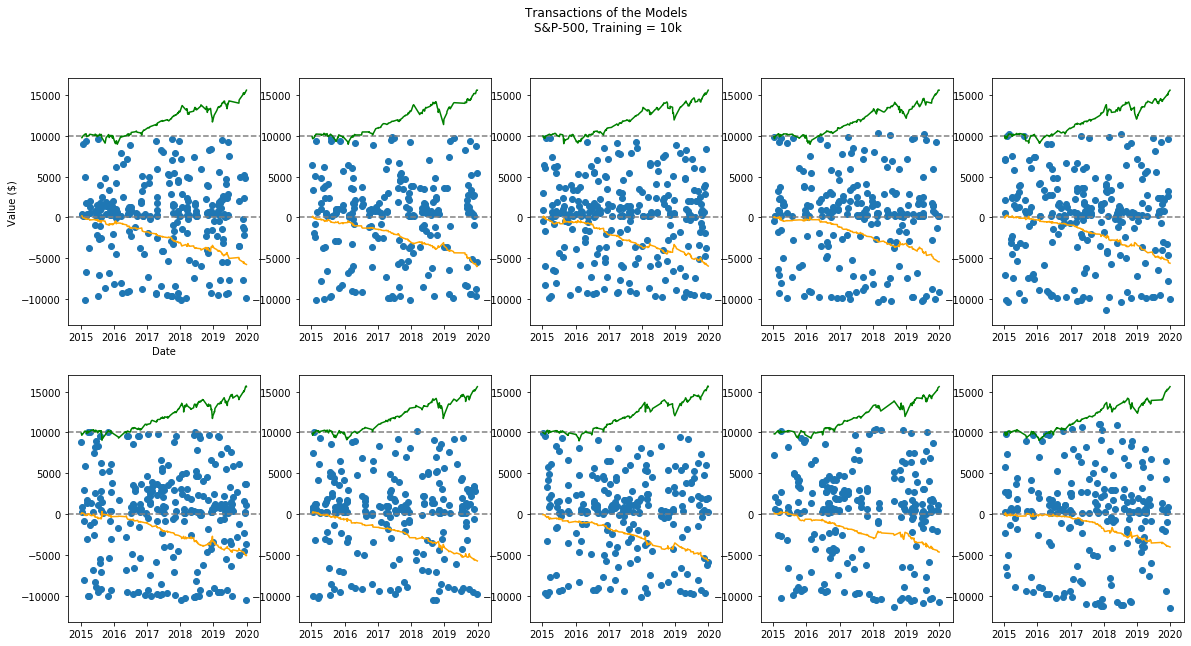

In [10]:
DIR = "./output/14"
plt.figure(figsize=(20,10))
plt.suptitle("Transactions of the Models \nS&P-500, Training = 10k")
for i in range(10):
    try:
        if i == 0:
            ax0 = plt.subplot(2, 5, 1)
            plt.xlabel("Date")
            plt.ylabel("Value ($)")
        else:
            plt.subplot(2, 5, i+1, sharex=ax0, sharey = ax0)
        record = pickle.load(open(path.join(DIR,"sp500_Cashout_10k-Training_detailed-ModelNo-"+str(i)+".out"), "rb"))
        df = pd.DataFrame(record)
        plt.scatter(df['date'], df['action']*df['actual_price'])
        plt.axhline(y=0, color = "grey", linestyle='--')
        plt.axhline(y=10000, color = "grey", linestyle='--')
        plt.plot(df['date'], df['buyNhold_balance'], color = "green")
        plt.plot(df['date'], df['actual_profit'], color = 'orange')
    except Exception as e:
        print(e)

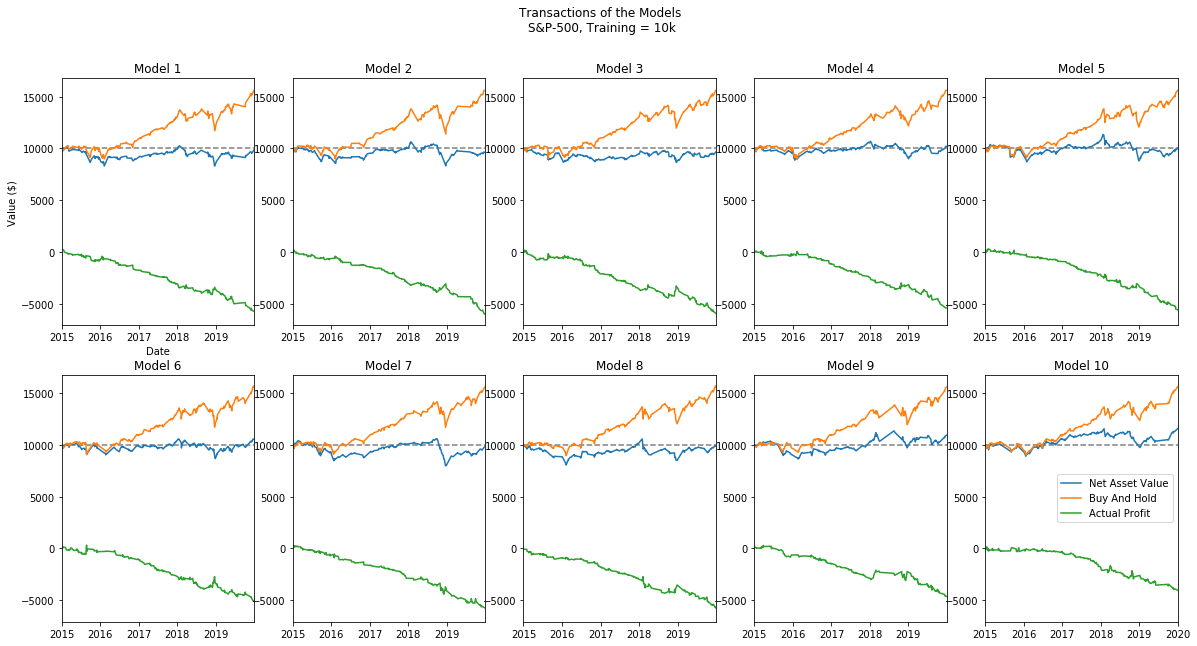

In [20]:
DIR = "./output/14"
axx = plt.figure(figsize=(20,10))
plt.suptitle("Transactions of the Models \nS&P-500, Training = 10k")
plt.rcParams['figure.facecolor'] = 'white'
# legend_list = ['S&P 500', 'Germany Dax', 'Hang Seng', 'CASH']
for i in range(10):
    try:
        if i == 0:
            ax0 = plt.subplot(2, 5, 1)
            plt.xlabel("Date")
            plt.ylabel("Value ($)")
            ax = ax0
        else:
            ax = plt.subplot(2, 5, i+1, sharex=ax0, sharey = ax0)
        
        record = pickle.load(open(path.join(DIR,"sp500_Cashout_10k-Training_detailed-ModelNo-"+str(i)+".out"), "rb"))
        df = pd.DataFrame(record)
        plt.axhline(y=10000, color = "grey", linestyle='--')
#         plt.axhline(y=300000, color = "grey", linestyle='--')
        plt.xlim((pd.Timestamp('2015-01-01'),pd.Timestamp('2019-12-31')))
        ax.set_xticks([pd.Timestamp('2015-01-01'), pd.Timestamp('2016-01-01'), 
                       pd.Timestamp('2017-01-01'), pd.Timestamp('2018-01-01'),
                       pd.Timestamp('2019-01-01'), pd.Timestamp('2020-01-01')])
        plt.plot(df['date'], df['net_worth'], label="Net Asset Value")
        plt.plot(df['date'], df['buyNhold_balance'], label="Buy And Hold")
        plt.plot(df['date'], df['actual_profit'], label="Actual Profit")
#         for j in range(4):
#             plt.plot(df['date'], [tmp[j] for tmp in df['inventory']])
        plt.title("Model "+str(i+1))
    except Exception as e:
        print(e)
plt.legend()
# axx.legend(['Initialized Value','S&P 500', 'Germany DAX', 'Hang Seng', 'CASH'])

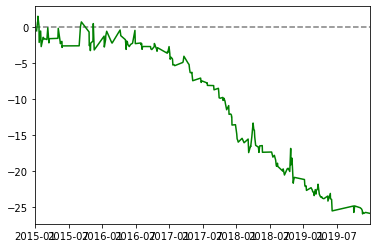

In [23]:
plt.xlim(pd.Timestamp(2015, 1, 1), pd.Timestamp(2019, 12, 31))
plt.axhline(y=0, color = "grey", linestyle='--')
# plt.axhline(y=10000, color = "grey", linestyle='--')
plt.plot(df['date'], df['actual_profit']/df['buyNhold_balance']*100, color = "green")
# plt.plot(df['date'], df['net_worth'], color = 'orange')